## Essential Libraries

In [2]:
import pandas as pd
import seaborn as sns
import xgboost as xgb
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data Importation and Description


In [3]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [4]:
df = pd.read_csv("/content/titanic - titanic.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df = df.drop("Cabin",axis=1)
df = df.dropna(subset="Embarked")
df["Age"] = df["Age"].fillna(df["Age"].mean())
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Visualization

### Bar Plot on Person Class and Fare based on Survival

Text(0.5, 1.0, 'Pclas and Fare based on Survival')

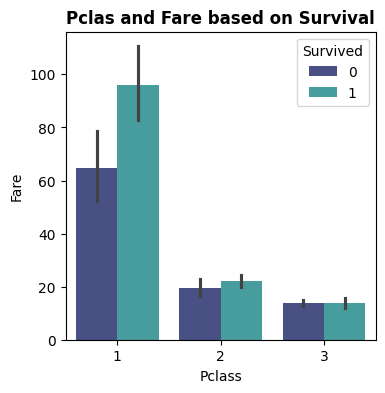

In [8]:
plt.figure(figsize=(4,4))
sns.barplot(x="Pclass", y="Fare",hue="Survived",palette="mako",data=df)
plt.title("Pclas and Fare based on Survival",fontsize=12,fontweight='bold')

### Cat Plot on Fare and Survival based on Survival

Text(0.5, 1.0, 'Pclas and Fare based on Survival')

<Figure size 400x400 with 0 Axes>

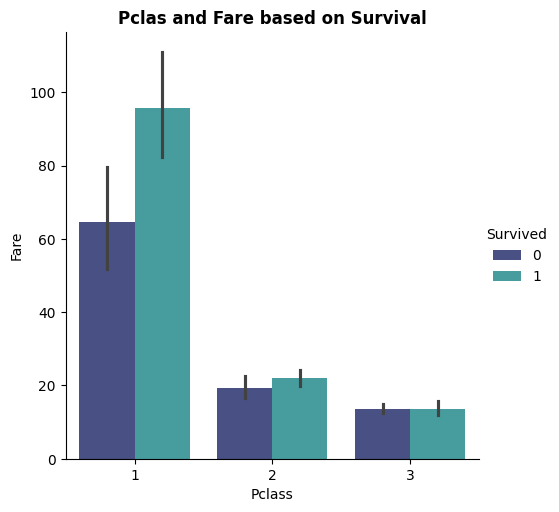

In [9]:
plt.figure(figsize=(4,4))
sns.catplot(x="Pclass", y="Fare",hue="Survived",palette="mako",data=df,kind='bar')
plt.title("Pclas and Fare based on Survival",fontsize=12,fontweight='bold')

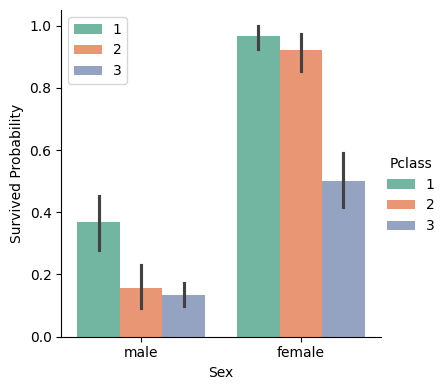

In [10]:
x = sns.catplot(x="Sex", y="Survived", data=df, kind="bar", height=4, hue="Pclass",palette="Set2")
x.set_ylabels("Survived Probability")
plt.legend()
plt.show()

### Ratio of Died and Survived based on Gender (BarPlot)

In [11]:
df["Died"] = 1-df["Survived"]

Text(0.5, 1.0, 'Survival based on Sex')

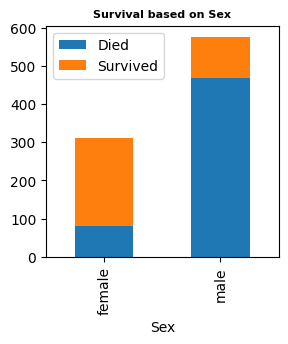

In [12]:
df.groupby("Sex")[["Died","Survived"]].sum().plot(kind="bar",figsize=(3,3), stacked=True)
plt.title("Survival based on Sex",fontsize=8,fontweight='bold')

### Ratio of Died and Survived based on P_class (BarPlot)

Text(0.5, 1.0, 'Survival based on P_class')

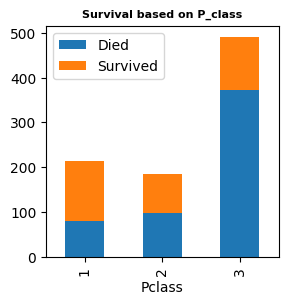

In [13]:
df.groupby("Pclass")[["Died","Survived"]].sum().plot(kind="bar",figsize=(3,3), stacked=True)
plt.title("Survival based on P_class",fontsize=8,fontweight='bold')

### Ratio of Died and Survived based on P_class (CatPlot)



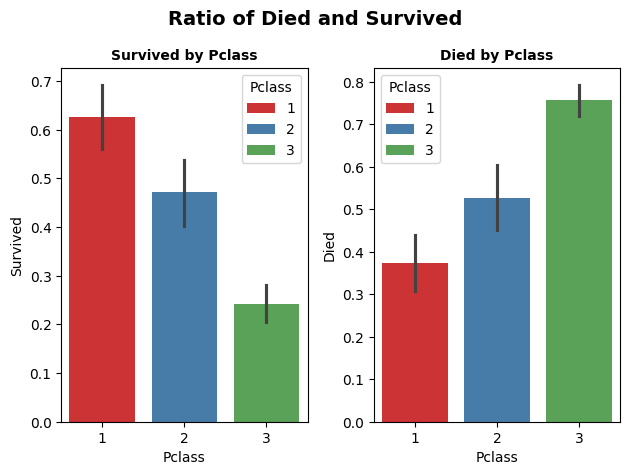

In [14]:
plt.subplot(1, 2, 1)
sns.barplot(x="Pclass", y="Survived", hue="Pclass", palette="Set1", data=df)
plt.title("Survived by Pclass", fontsize=10, fontweight='bold')

plt.subplot(1, 2, 2)
sns.barplot(x="Pclass", y="Died", hue="Pclass", palette="Set1", data=df)
plt.title("Died by Pclass", fontsize=10, fontweight='bold')

plt.suptitle("Ratio of Died and Survived", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

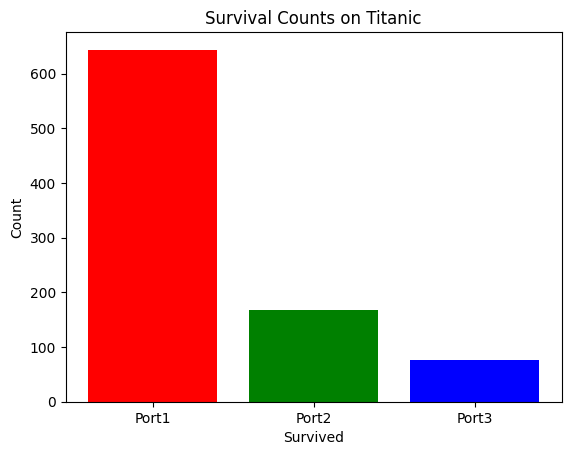

In [15]:
s_count = df["Embarked"].value_counts()
plt.bar(s_count.index,s_count.values,color=['r','g','b'])
plt.title('Survival Counts on Titanic')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(["S", "C", "Q"], ['Port1', 'Port2', "Port3"])
plt.show()

### Box Plot based on Sex

/tmp/ipython-input-181359534.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x="Sex",y="Age",palette="Set1")


Text(0.5, 1.0, 'Box Plot based on Sex')

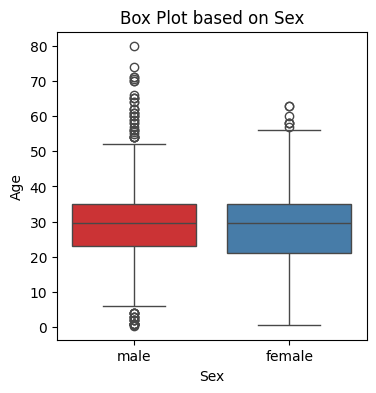

In [16]:
plt.figure(figsize=(4,4))
sns.boxplot(df,x="Sex",y="Age",palette="Set1")
plt.title("Box Plot based on Sex")

### Scatter Plot

<Axes: xlabel='Age', ylabel='Fare'>

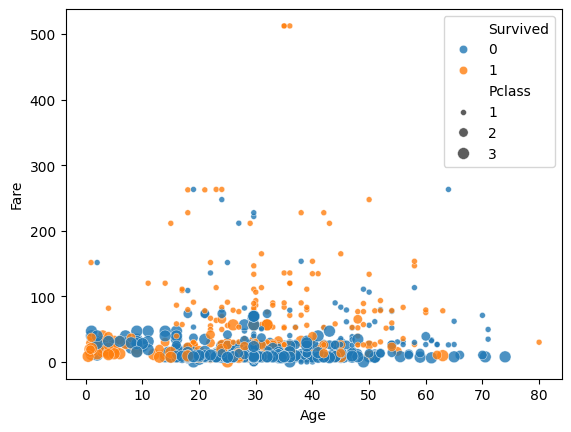

In [17]:
sns.scatterplot(df,x="Age",y="Fare",hue="Survived",size="Pclass",alpha=0.8)

### Hist Plot


<Axes: xlabel='Age', ylabel='Count'>

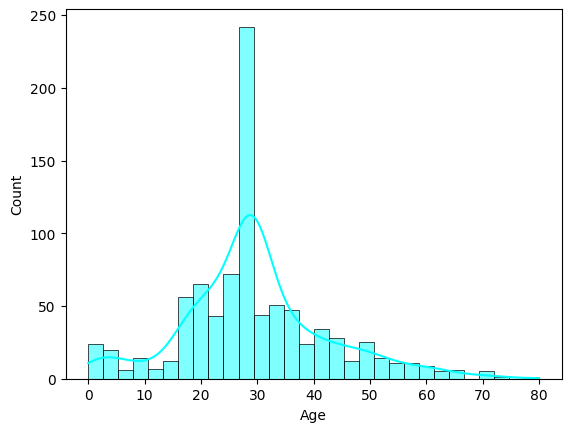

In [18]:
sns.histplot(x=df["Age"].astype("int64"),kde=True,color='cyan',edgecolor="black",linewidth=.5)

### Dist Plot

/tmp/ipython-input-3138883851.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df,x=df["Age"].astype('int64'))


<Axes: ylabel='Density'>

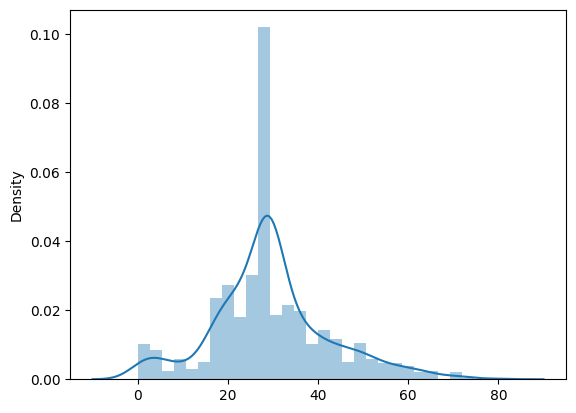

In [19]:
sns.distplot(df,x=df["Age"].astype('int64'))

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


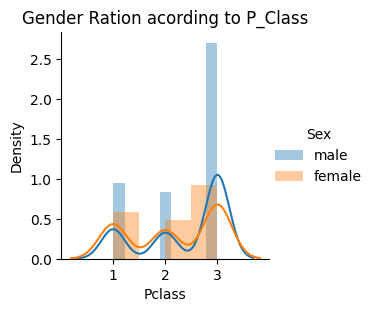

In [20]:
sns.FacetGrid(df,hue="Sex").map(sns.distplot,"Pclass", kde=True).add_legend()
plt.title("Gender Ration acording to P_Class")
plt.show()

### Violine Plot

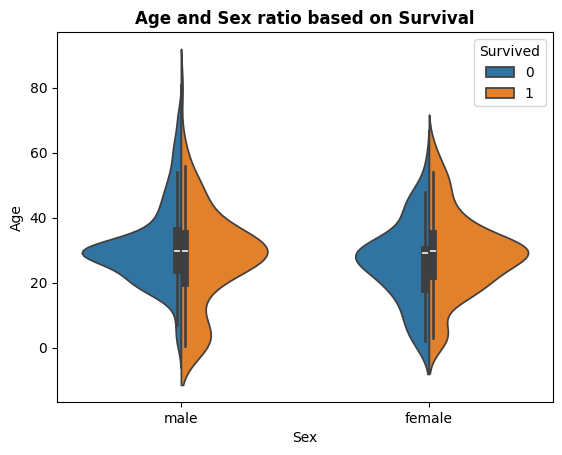

In [21]:
sns.violinplot(df,y='Age',x='Sex',hue='Survived',split=True)
plt.title("Age and Sex ratio based on Survival",fontweight='bold')
plt.show()

### Pie Plot

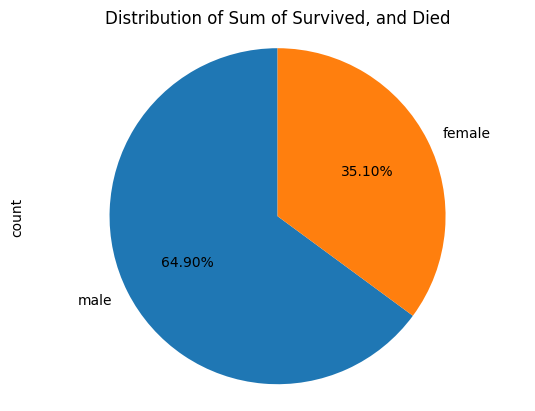

In [22]:
df["Sex"].value_counts().plot(kind='pie',autopct="%1.2f%%",startangle=90)
plt.axis('equal')
plt.title("Distribution of Sum of Survived, and Died")
plt.show()

### Donut Plot

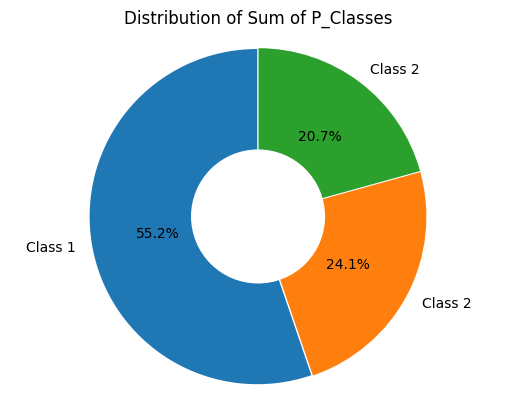

In [23]:
c_count = df["Pclass"].value_counts()
plt.pie(c_count,labels=["Class 1","Class 2","Class 2"],autopct="%1.1f%%",startangle=90,explode=(0.005,0.005,0.005))
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title("Distribution of Sum of P_Classes")
plt.show()

### KDE Plot (DensityPlot)

/tmp/ipython-input-4149573936.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex']=df['Sex'].replace(["male","female"],[0,1])


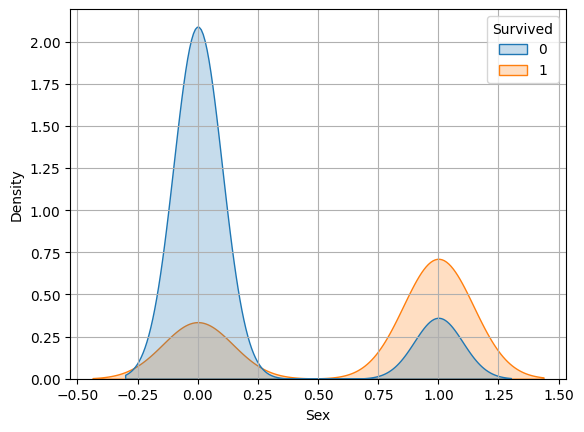

In [24]:
df['Sex']=df['Sex'].replace(["male","female"],[0,1])
sns.kdeplot(df,x="Sex",hue="Survived",fill=True)
plt.grid()

<Axes: xlabel='Age', ylabel='Density'>

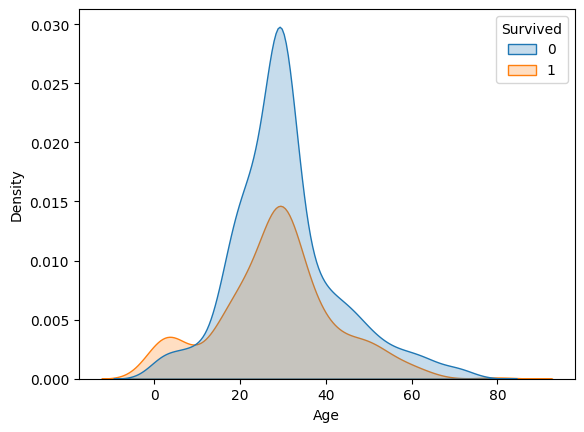

In [25]:
sns.kdeplot(df,x="Age",hue="Survived",fill=True)

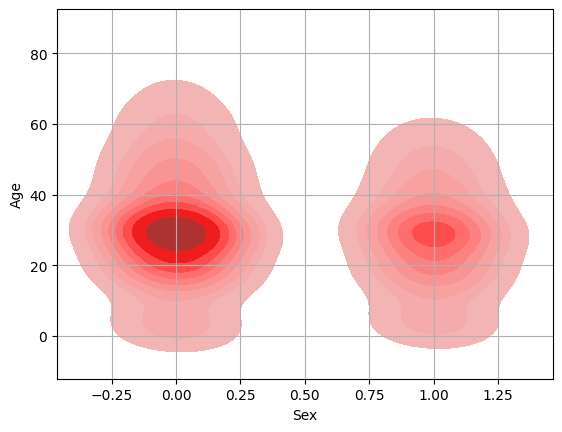

In [26]:
sns.kdeplot(df,x="Sex",y="Age",fill=True,color='r')
plt.grid()

### Pair Plot

# 3D Visualization

In [27]:
px.scatter_3d(df,x="Age",y="Sex",z="Survived",color="Pclass")

# Data Preprocessing


In [28]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1


In [29]:
df.dropna(inplace = True)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
embarked_data = pd.get_dummies(df['Embarked'], drop_first = True,dtype=int)
df = pd.concat([df, embarked_data], axis = 1)
df.drop(['Name', 'PassengerId', 'Ticket', 'Embarked', 'Died'], axis = 1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


# Model Training

In [30]:
x = df.drop("Survived",axis=1)
y = df["Survived"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Logistic Regression

In [31]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

y_pred = lr_model.predict(x_test)

print("Train Score:",lr_model.score(x_train,y_train))
print("Test Score:",lr_model.score(x_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_accuracy)

Train Score: 0.8016877637130801
Test Score: 0.7808988764044944
[[85 24]
 [15 54]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178

Accuracy: 0.7808988764044944


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## XGBoost

In [32]:
xgb_model = xgb.XGBClassifier(
    n_estimators=1000,
    max_depth=3,
    learning_rate=0.05,
    gamma=0.2,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    early_stopping_rounds=50
)

xgb_model.fit(
    x_train, y_train,
    eval_set=[(x_train, y_train), (x_test, y_test)],
    verbose=False
)

y_pred_xgb = xgb_model.predict(x_test)

train_score = xgb_model.score(x_train, y_train)
test_score = xgb_model.score(x_test, y_test)

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")
print("-" * 30)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("-" * 30)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("-" * 30)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Train Score: 0.8509
Test Score: 0.8371
------------------------------
Confusion Matrix:
[[99 10]
 [19 50]]
------------------------------
XGBoost Accuracy: 0.8371
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       109
           1       0.83      0.72      0.78        69

    accuracy                           0.84       178
   macro avg       0.84      0.82      0.82       178
weighted avg       0.84      0.84      0.83       178



<Figure size 1000x600 with 0 Axes>

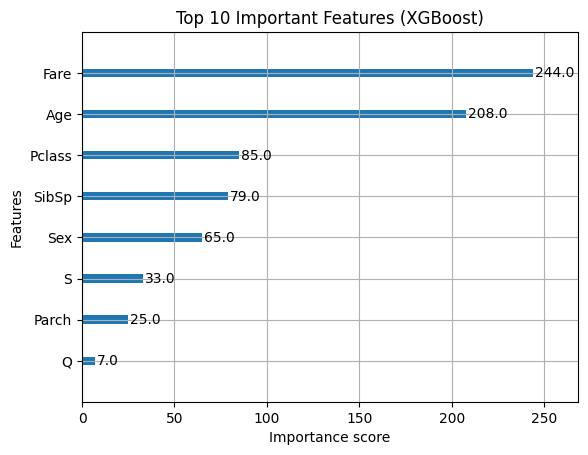

In [33]:
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title("Top 10 Important Features (XGBoost)")
plt.show()

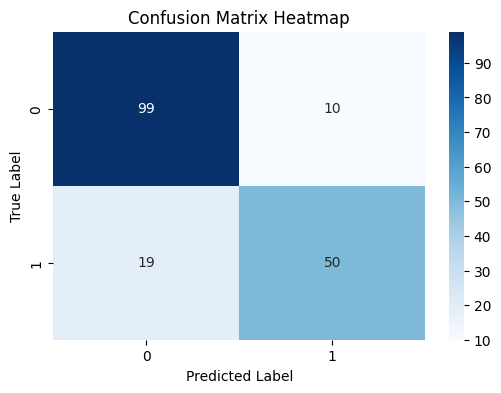

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [35]:
rf_model = RandomForestClassifier(
    n_estimators=1000,
    max_depth=3,
    max_features=0.8,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

train_score_rf = rf_model.score(x_train, y_train)
test_score_rf = rf_model.score(x_test, y_test)

print(f"Train Score: {train_score_rf:.4f}")
print(f"Test Score: {test_score_rf:.4f}")
print("-" * 30)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("-" * 30)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("-" * 30)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Train Score: 0.8326
Test Score: 0.8090
------------------------------
Confusion Matrix:
[[92 17]
 [17 52]]
------------------------------
Random Forest Accuracy: 0.8090
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.75      0.75      0.75        69

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



# Model Saving

In [36]:
import pickle
with open('Titanic_survival_Prediction.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

print(f"Model saved successfully as Titanic_survival_Prediction.pkl")

Model saved successfully as Titanic_survival_Prediction.pkl
